In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

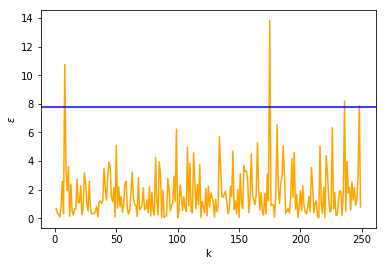

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
y=[0.664587,
0.343942,
0.255879,
0.0792915,
0.842282,
2.57447,
0.317224,
10.7402,
3.41423,
1.93836,
3.63036,
0.144883,
2.37933,
0.486947,
0.22297,
0.661921,
0.662743,
2.72078,
1.06411,
1.10129,
2.26279,
0.231758,
0.732757,
3.1608,
2.4072,
0.962485,
0.511675,
2.58496,
0.640764,
0.30938,
0.330936,
0.31836,
0.483434,
0.819415,
0.0944567,
1.1578,
1.21571,
1.03474,
1.22721,
3.49962,
2.21069,
1.26348,
2.93079,
3.93128,
3.62565,
1.47491,
1.14403,
2.14505,
0.070835,
5.10696,
0.692814,
2.18047,
0.792355,
1.5183,
0.432347,
0.896917,
2.42181,
2.59192,
0.671838,
0.287246,
0.612313,
1.80751,
3.21573,
1.32846,
0.951479,
0.881243,
0.103334,
2.8417,
0.603017,
0.675416,
0.926696,
2.12403,
0.583505,
0.690257,
1.28359,
0.380731,
2.20653,
0.152077,
1.799,
0.52418,
0.214806,
4.26036,
1.17169,
0.21396,
3.94582,
3.08508,
0.060288,
1.95133,
0.0378784,
0.144518,
0.153523,
2.78142,
1.99815,
0.500674,
0.952562,
1.01728,
2.94122,
1.14525,
6.22702,
0.0198892,
0.47436,
2.32084,
1.62071,
0.53168,
1.49874,
0.73373,
0.476058,
4.96769,
0.870642,
3.83578,
0.472981,
0.372811,
4.56888,
2.44768,
0.656401,
2.35113,
0.948712,
3.74841,
0.0461473,
1.19138,
0.76407,
0.372782,
2.08311,
0.158797,
2.22015,
0.783509,
1.77317,
1.46499,
1.16664,
0.0859651,
1.32868,
0.440764,
0.967074,
5.69244,
3.48407,
1.54403,
1.44699,
1.68499,
1.87812,
1.20498,
0.315586,
0.608944,
2.23783,
1.51013,
4.69778,
0.60871,
1.22114,
0.298933,
2.01756,
0.0326984,
3.11452,
1.05936,
0.671386,
3.6702,
3.26394,
3.30541,
2.66109,
0.385618,
1.43815,
4.49271,
1.58154,
1.29032,
0.952721,
1.61361,
5.2742,
2.05234,
0.576696,
1.78892,
0.472343,
0.220055,
1.74168,
0.28964,
3.09539,
1.21305,
13.8455,
0.903828,
0.949154,
0.894875,
0.0847398,
1.76944,
6.52816,
2.06443,
1.03666,
2.53529,
2.80828,
5.04636,
3.09364,
0.339148,
0.496405,
0.696401,
0.360754,
1.3469,
4.14071,
1.45711,
4.60545,
0.623581,
1.63699,
0.0406258,
0.817816,
1.90657,
0.524224,
2.28922,
0.8204,
0.416838,
0.303418,
0.721604,
1.53433,
0.446545,
3.53882,
2.25368,
0.378166,
1.02048,
1.20067,
0.0874239,
0.0281454,
5.04458,
1.02656,
0.332828,
2.16122,
0.0440969,
4.36999,
3.26036,
1.49619,
0.445987,
0.532589,
6.33345,
0.660649,
1.81108,
0.190376,
0.213387,
1.21084,
1.92073,
1.87729,
0.184728,
1.89532,
8.18867,
0.502526,
3.98004,
1.76389,
2.15435,
0.587318,
2.54295,
1.27056,
2.12882,
0.899389,
1.3034,
3.00148,
7.86733,
0.794038]
x = list(range(1, len(y)+1))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color="orange")
ax.axhline(7.8, color="blue")
ax.set_xlabel('k')
ax.set_ylabel(r'$\epsilon$')
plt.show()

In [3]:
a=[1,2,3]
print(a*10)

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]


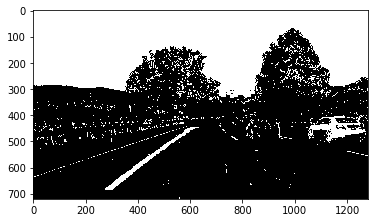

In [2]:
img=cv2.imread('./frames/frame1001.jpg')
plt.imshow(img)
hls=cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0)

binary_image=np.zeros_like(hls[:,:,0])
scaled_sobel=np.uint8(255*np.absolute(sobelx)/np.max(sobelx))
binary_image[((scaled_sobel>=30) & (scaled_sobel<=150))|((hls[:,:,2]>=80) & (hls[:,:,2]<=255) & (hls[:,:,1]>=80) & (hls[:,:,1]<=255))]=1
plt.imshow(binary_image,cmap='gray')

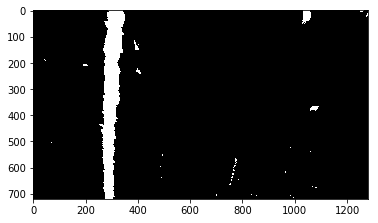

In [3]:
import os
def get_transformation_matrix(src,dest):
    transformation_matrix=cv2.getPerspectiveTransform(src,dest)
    return transformation_matrix
def perspective_transform(image,transformation_matrix):
    img_size=(image.shape[1],image.shape[0])
    transformed_image=cv2.warpPerspective(image,transformation_matrix,img_size,flags=cv2.INTER_LINEAR)
    return transformed_image

src_points=np.float32([[790,490],[1090,670],[207,675],[510,490]])
dest_points=np.float32([[1100,0],[1100,720],[200,720],[200,0]])
#src_points=np.float32([[800,490],[1100,650],[210,650],[500,490]])
#dest_points=np.float32([[1100,0],[1100,720],[200,720],[200,0]])
transformation_matrix=get_transformation_matrix(src_points,dest_points)
transformed_image=perspective_transform(binary_image,transformation_matrix)
plt.imshow(transformed_image,cmap='gray')

In [26]:
def apply_sobel_and_color_thresholding(image,thresholds_sobel,threshold_l,thresholds_s,kernel_size=3,Color_Encoding='BGR'):
    
    if(Color_Encoding=='BGR'):
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        hls=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    else:
        gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        hls=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    s_channel=hls[:,:,1]
    v_channel=hls[:,:,2]
    sobelx=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=kernel_size)
    scaled_sobel=np.uint8(255*np.absolute(sobelx)/np.max(sobelx))
    binary_image=np.zeros_like(scaled_sobel)
    binary_image[((scaled_sobel>=thresholds_sobel[0]) &((hls[:,:,1]>=thresholds_s[0]) & (hls[:,:,1]<=thresholds_s[1]) & (hls[:,:,1]>=threshold_l[0]) & (hls[:,:,1]<=threshold_l[1]))]=1
    return binary_image

SyntaxError: invalid syntax (<ipython-input-26-4fc0636c5684>, line 14)

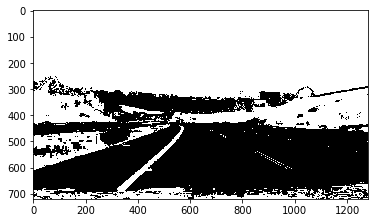

In [27]:
img=cv2.imread('./frames/frame15.jpg')
binary_image=apply_sobel_and_color_thresholding(img,[75,120],[60,255],[10,255])
plt.imshow(binary_image,cmap='gray')

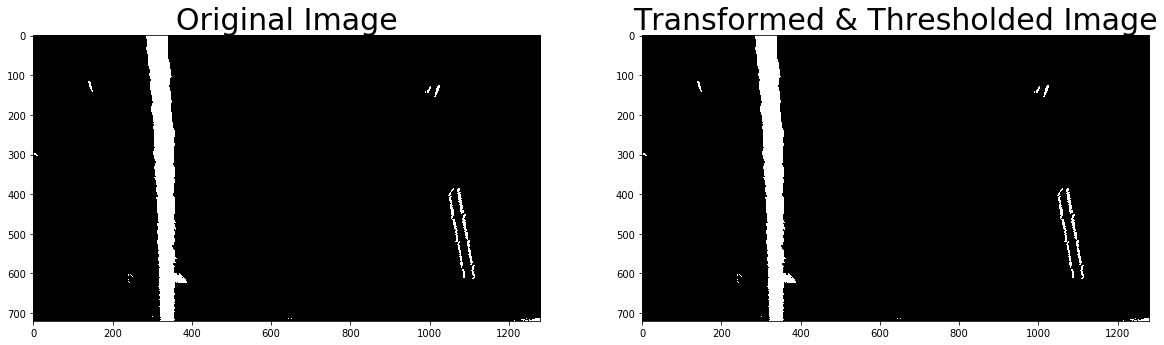

In [28]:
src_points = np.float32([[200,720], [600, 447], [679,447], [1100,720]])
dest_points = np.float32([[300, 720], [300, 0], [900, 0], [900, 720]])


transformed_image=perspective_transform(binary_image,transformation_matrix)
output_image=np.dstack((transformed_image,transformed_image,transformed_image))*255


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(output_image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(output_image)
ax2.set_title('Transformed & Thresholded Image', fontsize=30)